# Python Basic

![python](https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg)
### <center>--by wang liyao (leo)<center> ###

# agenda 

- Python History.
- Why Python?
- Work in Python
- Stdandard Type
- python operators
- <font color=gray size=6 face=“黑体”>Basic program</font>
- <font color=gray size=6 face=“黑体”>Function</font>
- <font color=gray size=6 face=“黑体”>Python file I/O</font>
- <font color=gray size=6 face=“黑体”>Regular Expression</font>
- <font color=gray size=6 face=“黑体”>class</font>
- Q&A






# Python History




## A Sneak View Of The History.



It was a Dutch programmer, Guido Van Rossum(吉多·范罗苏姆), who wrote Python as a hobby programming project back in the late 1980s. Since then it has grown to become one of the most polished languages of the computing world.

## What Led Guido To Create Python?

In his own words, Guido revealed the secret behind the inception of Python. He started working on it as a weekend project utilizing his free time during Christmas in Dec’1989. He originally wanted to create an interpreter, a descendant of the ABC programming language which he was a contributing developer. And we all know that it was none other than Python which gradually transformed into a full-fledged programming language

## How The Name Python Came About?

Guido initially thought the Unix/C hackers to be the target users of his project. And more importantly, he was fond of watching the famous comedy series [The Monty Python’s Flying Circus]. Thus, the name Python struck his mind as not only has it appealed to his taste but also to his target users.

### List Of Known Python Releases.

<style>
table {
    width: 100%;
    max-width: 65em;
    border: 1px solid #dedede;
    margin: 15px auto;
    border-collapse: collapse;
    empty-cells: show;
}
table th {
    font-weight: bold; /*加粗*/
    text-align: center !important; /*内容居中，加上 !important 避免被 Markdown 样式覆盖*/
    background: rgba(158,188,226,0.2); /*背景色*/
}
table td {
  height: 105px; /*统一每一行的默认高度*/
  border: 1px solid #dedede; /*内部边框样式*/
  padding: 0 30px; /*内边距*/
}
</style>
<table>
  <thead>
    <tr>
      <th>Python Version</th>
      <th>Date of Release</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Python v0.1.0 (The First Edition)</td>
      <td>1990</td>
    </tr>
    <tr>
      <td>Python v0.9.5 (Macintosh support)</td>
      <td>2nd Jan’1992</td>
    </tr>
    <tr>
      <td>Python v1.0.0</td>
      <td>26th Jan’1994</td>
    </tr>
    <tr>
      <td>Python v1.1.0</td>
      <td>26th Jan’1994</td>
    </tr>
    <tr>
      <td>Python v1.2.0</td>
      <td>Apr’1995</td>
    </tr>
    <tr>
      <td>Python v1.3.0</td>
      <td>Oct’1995</td>
    </tr>
    <tr>
      <td>Python v1.4.0</td>
      <td>Oct’1996</td>
    </tr>
     <tr>
      <td>Python v1.5.0	3rd</td>
      <td>Jan’1998</td>
    </tr>
    <tr>
      <td>Python v1.6.0 (Latest updated version)</td>
      <td>5th Sep’2000</td>
    </tr>
    <tr>
      <td>Python v2.0.0 (Added list comprehensions)</td>
      <td>16th Oct’2000</td>
    </tr>
    <tr>
      <td>Python v2.7.0 (Latest updated version)</td>
      <td>3rd Jul’2010</td>
    </tr>
    <tr>
      <td>Python v3.0.0	3rd</td>
      <td>Dec’2008</td>
    </tr>
    <tr>
      <td>Python v3.6.X (Latest updated versio)</td>
      <td>Mar’2017 and continued.</td>
    </tr>
  </tbody>
</table>

# Why Python?



>Life is short, you need Python. “人生苦短，我用Python” --by [Bruce Eckel](http://sebsauvage.net/python/)

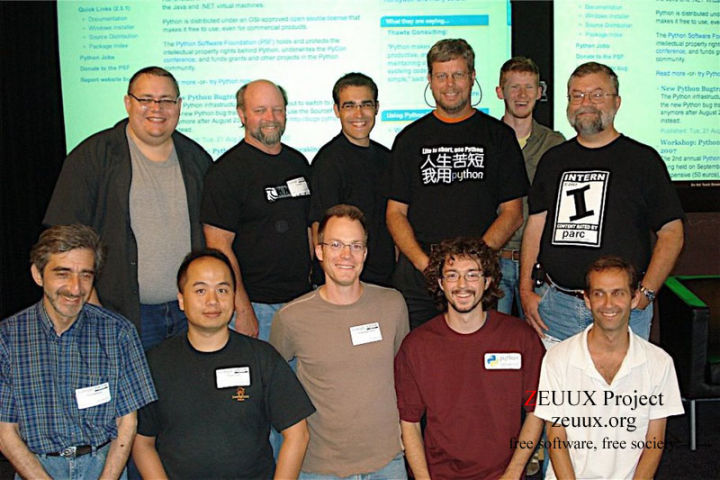

## python use scenario
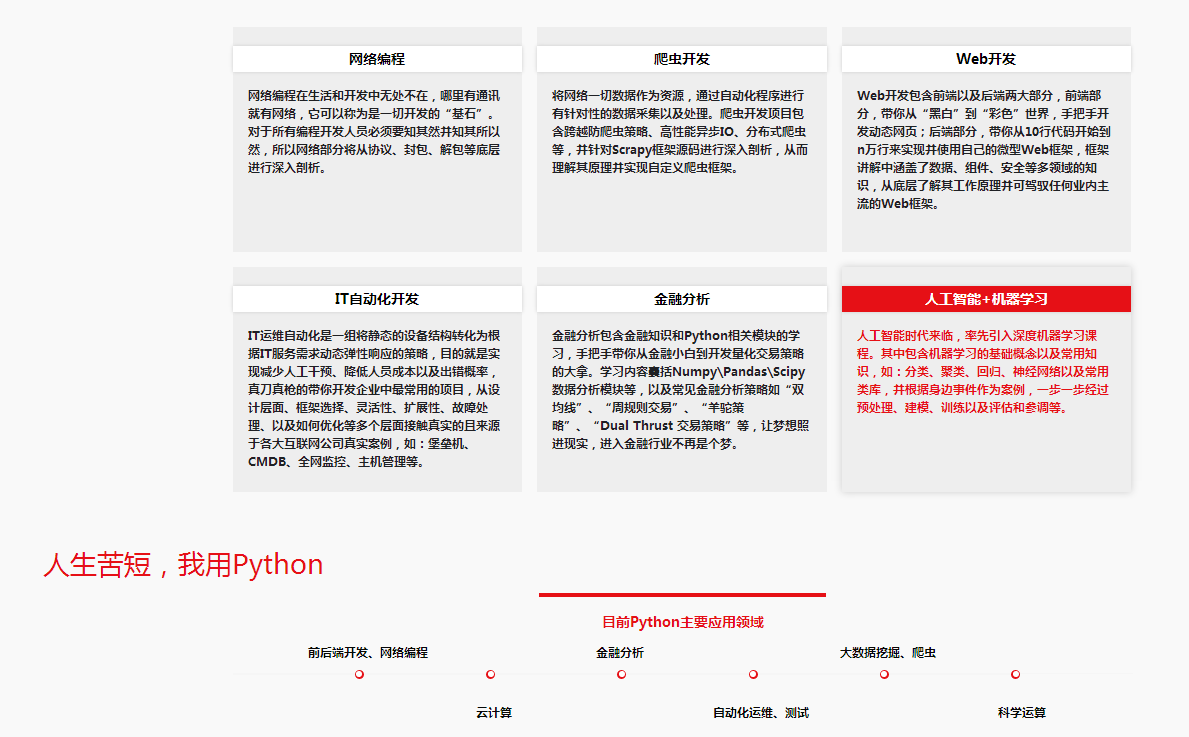





## use python company and market situation

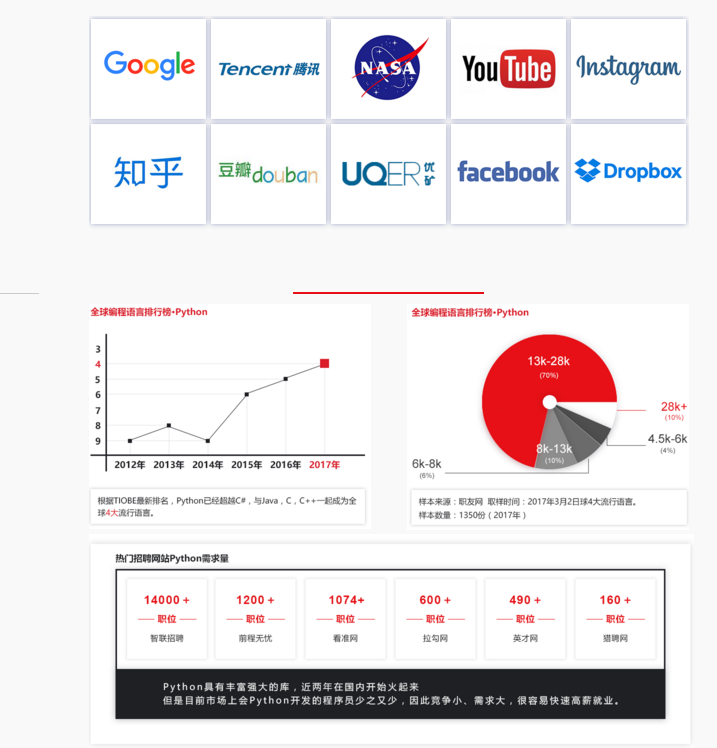
        

# Work in Python

## Work in Python
- install
- Edit
- Debug

## Install 
- ** Cpython **
- ** Jython **
- ** IronPy  thon ** 
- ** Pypy **



### Install python On Your System



- If you're running Windows: the most stable Windows downloads are available from the [Python for Windows page](https://www.python.org/downloads/windows/).

- If you're running Windows XP: the guide to installing ActivePython is at [Python on XP: 7 Minutes To "Hello World!".MeDo](http://www.richarddooling.com/index.php/2006/03/14/python-on-xp-7-minutes-to-hello-world/) has two videos for installing and getting started with Python on a Windows XP machine - this series talks you through the Python, [ActivePython](https://wiki.python.org/moin/ActivePython) and [SciPy](https://wiki.python.org/moin/SciPy) distributions.

- If you are using a Mac, see the [Python for Mac OS X page](https://www.python.org/downloads/mac-osx/). MacOS 10.2 (Jaguar), 10.3 (Panther), 10.4 (Tiger) and 10.5 (Leopard) already include various versions of Python.

- For Red Hat, install the python2 and python2-devel packages.

- For Debian or Ubuntu, install the python2.x and python2.x-dev packages.

- For Gentoo, install the '=python-2.x*' ebuild (you may have to unmask it first).

- For other systems, or if you want to install from source, see the [general download page](http://www.python.org/download/).

### verify Python version


In [ ]:

#Python 2.7  vs Python3
$ python –version
Python 2.7.12

import sys
print sys.version_info
print sys.version


## Edit
- eclipse
- pycharm
- VIM/Emacs/Notepad++
- Jupyter
- [codepad](http://codepad.org/)
- ** [pythonanywhere](https://www.pythonanywhere.com/) **


##  Debug

- print
- python inspect
- pdb
- logging



### print

print in python 2 print() in python 3 print str(A)

In [ ]:
print 'hello world'

print 'hello world',

print "中国"

print '%x' % 18
print '%o' % 18

### [Print Formatter](https://blog.csdn.net/zanfeng/article/details/52164124)

In [ ]:
strHello = "the length of (%s) is %d" %('Hello World',len('Hello World'))
print strHello



In [ ]:
nHex = 0x20
#%x --- hex 十六进制
#%d --- dec 十进制
#%o --- oct 八进制
 
print "nHex = %x,nDec = %d,nOct = %o" %(nHex,nHex,nHex)

In [ ]:
import math
#default
print "PI = %f" % math.pi
#width = 10,precise = 3,align = left
print "PI = %10.3f" % math.pi
#width = 10,precise = 3,align = rigth
print "PI = %-10.3f" % math.pi
#前面填充字符
print "PI = %06d" % int(math.pi)
 
#输出结果
#PI = 3.141593
#PI =      3.142
#PI = 3.142
#PI = 000003
#浮点数的格式化，精度、度和


### formatter type
- 'b' - 二进制。将数字以2为基数进行输出。
- 'c' - 字符。在打印之前将整数转换成对应的Unicode字符串。
- 'd' - 十进制整数。将数字以10为基数进行输出。
- 'o' - 八进制。将数字以8为基数进行输出。
- 'x' - 十六进制。将数字以16为基数进行输出，9以上的位数用小写字母。
- 'e' - 幂符号。用科学计数法打印数字。用'e'表示幂。
- 'g' - 一般格式。将数值以fixed-point格式输出。当数值特别大的时候，用幂形式打印。
- 'n' - 数字。当值为整数时和'd'相同，值为浮点数时和'g'相同。不同的是它会根据区域设置插入数字分隔符。
- '%' - 百分数。将数值乘以100然后以fixed-point('f')格式打印，值后面会有一个百分号。

In [ ]:
### [example](https://blog.csdn.net/ztf312/article/details/47173575)
# 打印字符串  
print ("His name is %s" % ("Aviad"))  
#His name is Aviad  
# 打印整数  
print ("He is %d years old" % (25))  
#He is 25 years old<pre name="code" class="python">print ("He is %d years old" % (25))  
#He is 25 years old  
# 打印浮点数  
print ("His height is %f m" % (1.83))  
#His height is 1.83 m  
# 打印浮点数（指定保留小数点位数）  
print ("His height is %.2f m" % (1.83))  
#His height is 1.83 m"print "His height is ", format(1.83, '.2f'), "m"  
# 指定占位符宽度  
print ("Name:%10s Age:%8d Height:%8.2f" % ("Aviad",25,1.83))  
#Name:Aviad Age: 25 Height: 1.83  
# 指定占位符宽度（左对齐）  
print ("Name:%-10s Age:%-8d Height:%-8.2f" % ("Aviad",25,1.83))  
#Name:Aviad Age:25 Height:1.83  
# 指定占位符（用0或者空格当占位符）  
print ("Name:%-10s Age:%08d Height:%08.2f" % ("Aviad",25,1.83))  
#Name:Aviad Age:00000025 Height:00001.83  
# 调用format函数,format(数值, '格式')  
print('test:{0:10f}'.format(math.pi))  
#test: 3.141593#若输出位数小于10，则默认右对齐。若输出位数大于宽度，则按实际位数输出format(0.0015,'.2e')  
#1.50e-03# 格式化指示符  
print '6:\t|{0:b}'.format(3)  
print '7:\t|{0:c}'.format(3)  
print '8:\t|{0:d}'.format(3)  
print '9:\t|{0:o}'.format(3)  
print '10:\t|{0:x}'.format(3)  
print '11:\t|{0:e}'.format(3.75)  
print '12:\t|{0:g}'.format(3.75)  
print '13:\t|{0:n}'.format(3.75) #浮点数  
print '14:\t|{0:n}'.format(3) #整数  
print '15:\t|{0:%}'.format(3.75)

In [ ]:
what is %r in print ?

what is print in python 2.* ?

### python inspect

In [ ]:
import this

#### vars()

#### dir()

#### inspect

In [ ]:
from collections import namedtuple
import inspect 
print(inspect.getsource(namedtuple))


### [pdb](https://docs.python.org/3/library/pdb.html) 

用pdb调试有多种方式可选：

1. 命令行启动目标程序，加上-m参数，这样调用myscript.py的话断点就是程序的执行第一行之前
python -m pdb myscript.py

2. 在Python交互环境中启用调试
```python
import pdb
import mymodule
pdb.run(‘mymodule.test()’)
```

3. 比较常用的，就是在程序中间插入一段程序，相对于在一般IDE里面打上断点然后启动debug，不过这种方式是hardcode的
```python
if __name__ == "__main__":
a = 1
import pdb
pdb.set_trace()
b = 2
c = a + b
print (c)
```

### [logging](https://docs.python.org/3/library/logging.html)


#### basic useage

```python
import logging
logging.basicConfig(level = logging.INFO,format = '%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

logger.info("Start print log")
logger.debug("Do something")
logger.warning("Something maybe fail.")
logger.info("Finish")
```


logging.basicConfig函数各参数：
filename：指定日志文件名；
filemode：和file函数意义相同，指定日志文件的打开模式，'w'或者'a'；
format：指定输出的格式和内容，format可以输出很多有用的信息，

参数：作用
%(levelno)s：打印日志级别的数值
%(levelname)s：打印日志级别的名称
%(pathname)s：打印当前执行程序的路径，其实就是sys.argv[0]
%(filename)s：打印当前执行程序名
%(funcName)s：打印日志的当前函数
%(lineno)d：打印日志的当前行号
%(asctime)s：打印日志的时间
%(thread)d：打印线程ID
%(threadName)s：打印线程名称
%(process)d：打印进程ID
%(message)s：打印日志信息
datefmt：指定时间格式，同time.strftime()；
level：设置日志级别，默认为logging.WARNNING；
stream：指定将日志的输出流，可以指定输出到sys.stderr，sys.stdout或者文件，默认输出到sys.stderr，当stream和filename同时指定时，stream被忽略；

#### logging file

In [ ]:
import logging
logger = logging.getLogger(__name__)
logger.setLevel(level = logging.INFO)
handler = logging.FileHandler("log.txt")
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

logger.info("Start print log")
logger.debug("Do something")
logger.warning("Something maybe fail.")
logger.info("Finish")

#### loggoing to console and file

In [ ]:
import logging
logger = logging.getLogger(__name__)
logger.setLevel(level = logging.INFO)
handler = logging.FileHandler("log.txt")
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

console = logging.StreamHandler()
console.setLevel(logging.INFO)

logger.addHandler(handler)
logger.addHandler(console)

logger.info("Start print log")
logger.debug("Do something")
logger.warning("Something maybe fail.")
logger.info("Finish")

# Standard Type


## Standard Type
- Booleans
- int
- string
- list
- tuple
- DIctionary

## Standard Type

A boolean is such a data type that almost every programming language has, and so is Python. Boolean in Python can have two values – True or False. These values are constants and can be used to assign or compare boolean values. Follow a simple example given below.
```
condition = False
if condition == True:
    print("You can continue with the prpgram.")
else:
    print("The program will end here.")
```
While making boolean conditions in Python, we can skip the explicit comparison in our code. And we’ll still get the same behavior.
```
condition = False
if condition:
    print("You can continue with the prpgram.")
else:
    print("The program will end here.")
```



In some cases, the boolean constants “True” and “False” might also act as numbers.
```
>>> A, B = True + 0, False + 0
>>> print(A, B)
1 0
>>> type(A), type(B)
(<class 'int'>, <class 'int'>)
```

## Standard Type




### int


- 10, 0b10, 010, 0x10

- int ()
- long() in python 2

- size of int
** 32/64 bits in python 2
** No limit in python 3

## Standard Type


### String
- char in sequences

```python
a = "Hello World"
b = 'Python is groovy'

c = "This is a long string \
which is splitted in tow lines"

d = '''Content-type: text/html
<h1> Hello World </h1>
Click <a href="https://www.python.org">here</a>.
'''
```


### String
#### indexing

### 0, 1, 2, 3...-3, -2, -1
```python
a = "Hello World"

b = a[4]
```

#### Slicing [start:end:stride]
```python
e = a[3:8]
print 'e:', e
f = a[1:9:2]
print "f:", f
c = a[:5]
print "c:", c
d = a[6:]
print 'd:', d
```
#### string1 + string 2 -> "string1 string2"
```python
print "hello" + "nokia"
```
#### update -- String is immutable so it can not be changed after creation
```python
a = "string1"
b = a + "tail"
print b, id(a), id(b)
```



### String
- split, join

s = 'a,b,c,d,e'
l = s.split(',')        # l == [‘a’, ‘b’, ‘c’, ‘d’, ‘e’]
s = '|'.join(l)         # s == 'a|b|c|d|e'

- str()
- len()  --  no recommended 
- ‘’.startswith(‘All’), endswith(‘OK’)
- “”.find(‘the’), “”.rfind(‘end’)
- “”.count(“a”)
- “”.isalnum(), “”.upper(), “”.lower()
- “”.strip()
- “”.replace(‘old’, ‘new’, max_times)




### string modulus: s % d
- s: format string
- d: a collection of objects in a tuple or dict

```python
x = 34
y = 32
s1 = "The value of x, y is %d %d" % (x, y)

d = {'x':13, 'y':1.54321, 'z’: 'world'}
r = "%(x)d %(y).2f" % d # r = "13 1.54"
```

### string

** Exercise: **

Giving a string “I am from Nokia”. Get these values with string operations.
1. the third char 
2. every 4th char 

## Standard Type

### List

- create
- indexing
- slicing
- unpacking
- update


### list
- create
```python
empty_list = []
another_empty_list = list()
Weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']
```
- Indexing
```python
print Weekdays[0], Weekdays[-1]
```
- slicing
```python
print Weekdays[2:-1]
```
- Unpacking
```python
first_name, second_name = ["san", "zhang"]
a, b, c = [1, [2, 3]]  #??
```

- update
```python
names = []
names[0] = "Jeff” #???
names[0:2] = ['Mike', 'Tom', 'Mary'] ##???
names.append("Paula"), names.pop(), names.pop(0)
names.insert(2, "Thomas")
del names[0]      #Item deletion
del names[0:2]    #Slice deletion
a = [1,2,3] + [4,5] # Result is [1,2,3,4,5]
```

### list

- ‘john’ in [‘Chico’, ’Coach’, ’john’]
- list.sort(), list.sort(reverse=True)
- sorted(list)
- len()
- =, copy(), list(), [:]

```python
a = [1, 2, 3]
b = a
c = copy.copy(a)
d = list(a)
e = a[:]
```


In [ ]:
import copy
a = [1, 2, 3]
b = a
c = copy.copy(a)
d = copy.deepcopy(a)
e = list(a)
f = a[:]
id(a), id(b), id(c), id(d), id(e), id(f)

### Exercise!


-  Create a list named ‘things’ with ‘mozzarella’, ‘cinderella’, and ‘salmonella’.
    1. Capitalize all in ‘things’
    2. Sorting ‘things’ from ‘z’ to ‘a’

In [ ]:
strs = ['mozzarella', 'cinderella', 'salmonella']
for s in strs:
    print s.capitalize()
    s = s[0].upper() + s[1:]
    print s

strs.sort(reverse=True)
print strs

print sorted(strs, reverse=True)


## Standard Type
 

### tuple

- Constant list
    (    )
    tuple()
```python
marx_tuple = "Groucho", 'Chico', 'Harpo'
a, b, c = marx_tuple
```




### Exercise

Switch value of variables: ‘password’, ‘icecream’ in one statement

In [ ]:
b, a = 'password', 'icecream'
print (a, b)

## Standard Type

### Dictionary


A dictionary in Python is an unordered collection of key-value pairs. It’s a built-in mapping type in Python where keys map to values. These key-value pairs provide an intuitive way to store data.

- Why Need A Dictionary?
- Creating A Dictionary
- Accessing Dictionaries Elements With Keys
- Dictionaries Methods To Access Elements
- Modifying A Dictionary (Add/Update/Delete)

#### Why Need A Dictionary?

The dictionary solves the problem of efficiently storing a large data set. Python has made the dictionary object highly optimized for retrieving data.

#### Creating A Dictionary

Python syntax for creating dictionaries use braces {} where each item appears as a pair of keys and values. The key and value can be of any Python data types.
```
sample_dict = {'key':'value', 'jan':31, 'feb':28, 'mar':31}
type(sample_dict)
sample_dict
```

#### Accessing Dictionaries Elements With Keys
Dictionaries act like a database. Here, we don’t use a number to get a particular index value as we do with a list. Instead, we replace it with a key and then use the key to fetch its value.
```
>>> sample_dict['jan']
31
>>> sample_dict['feb']
28
>>> sample_dict.get('mar')
31
```



#### Dictionaries Methods To Access Elements

Python exposes following built-in dictionary functions.

- keys() – It isolates the keys from a dictionary.
- values() – It isolates the values from a dictionary.
- items() – It returns the items in a list style of (key, value) pairs.
```
>>> sample_dict.keys()
dict_keys(['mar', 'key', 'jan', 'feb'])
>>> sample_dict.values()
dict_values([31, 'value', 31, 28])
>>> sample_dict.items()
dict_items([('mar', 31), ('key', 'value'), ('jan', 31), ('feb', 28)])
```


#### Modifying A Dictionary (Add/Update/Delete)

Since the dictionary object is mutable, so we can call add, update and delete operations on a dictionary object.

See the below example for more clarity on how to modify a dictionary.
```
>>> sample_dict['feb'] = 29
>>> sample_dict
{'mar': 31, 'key': 'value', 'jan': 31, 'feb': 29}
>>> sample_dict.update({'apr':30})
>>> sample_dict
{'apr': 30, 'mar': 31, 'key': 'value', 'jan': 31, 'feb': 29}
>>> del sample_dict['key']
>>> sample_dict
{'apr': 30, 'mar': 31, 'jan': 31, 'feb': 29}
>>> lot = [('green', 'ground'), ('red', 5), ('blue', ['sky', 'sea'])]
>>>dlot = dict(lot)
>>> dlot
{'blue': ['sky', 'sea'], 'green': 'ground', 'red': 5}
>>> list(dlot.items())
[('blue', ['sky', 'sea']), ('green', 'ground'), ('red', 5)]
```

### Exercise

- Create a English-French dictionary named ‘e2f’, ‘dog’ is ‘chien’, ‘cat’ is ‘chat’, ‘walrus’ is ‘morse’
    1. Get French of ‘walrus’
    2. Create f2e dictionary from e2f


In [4]:
e2f = {'dog':'chien', 'cat':'chat','walrus':'morse'}
print e2f['walrus']

f2e = dict(zip(e2f.values(), e2f.keys()))
print f2e


morse
{'chien': 'dog', 'chat': 'cat', 'morse': 'walrus'}


##  python operators
- What Are Built-In Python Operators?
- Arithmetic Operators
- Comparison Operators
- Logical Operators

### What Are Built-In Python Operators?
Like many programming languages, Python reserves some special characters for acting as operators. Every operator has a pre-defined action like addition, multiplication to manipulate data and variables. The variables passed as input to an operator are known as operands. We also recommend you to read about keywords in Python.
```
>>> 7%4
3
>>> 7+4-2
9
>>>2*(3+4)
14
```


### Arithmetic Operators
With arithmetic operators, we can do various arithmetic operations like addition, subtraction, multiplication, division, modulus, exponent, etc. Python provides multiple ways for arithmetic calculations like eval function, declare variable & calculate, or call functions.

The table below outlines the built-in arithmetic operators in Python.

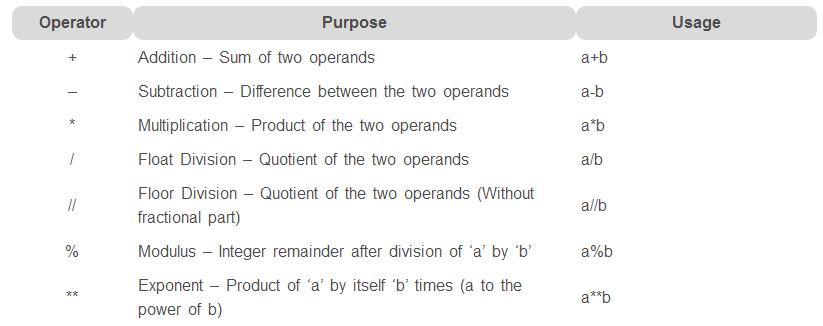


#### Example

In [2]:
a=7
b=4

print('Sum : ', a+b)
print('Subtraction : ', a-b)
print('Multiplication : ', a*b)
print('Division (float) : ', a/b)
print('Division (floor) : ', a//b)
print('Modulus : ', a%b)
print('Exponent : ', a**b)
print('Division (float) : ', 7.0/4)
print('Division (floor) : ', 7.0//4)


('Sum : ', 11)
('Subtraction : ', 3)
('Multiplication : ', 28)
('Division (float) : ', 1)
('Division (floor) : ', 1)
('Modulus : ', 3)
('Exponent : ', 2401)
('Division (float) : ', 1.75)
('Division (floor) : ', 1.0)


### Comparison Operators

In Python programming, comparison operators allow us to determine whether two values are equal or if one is greater than the other and then make a decision based on the result.

The table below outlines the built-in comparison operators in Python.

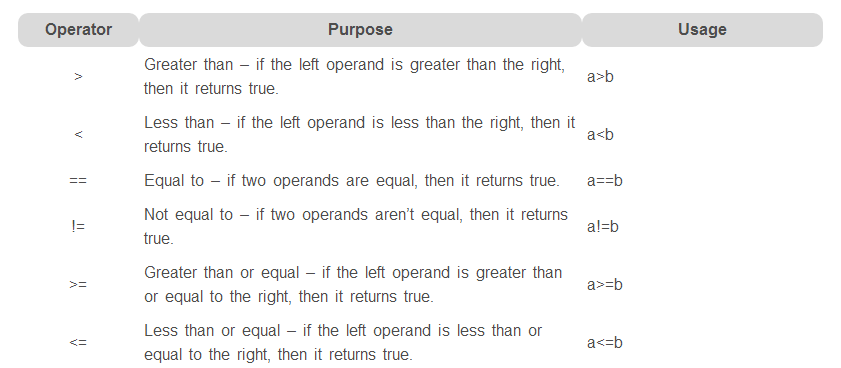

#### Example

In [ ]:
a=7
b=4

print('a > b is',a>b)

print('a < b is',a<b)

print('a == b is',a==b)

print('a != b is',a!=b)

print('a >= b is',a>=b)

print('a <= b is',a<=b)

### Logical Operators

The logical Python operators enable us to make decisions based on multiple conditions. The operands act as conditions that can result in a true or false value. The outcome of such an operation is either true or false (i.e., a Boolean value).

However, not all of these operators return a boolean result. The ‘and’ and ‘or’ operators do return one of their operands instead of a pure boolean value. Whereas the ‘not’ operator always gives a real boolean outcome.

Refer the below table and the example to know how these operators work in Python.

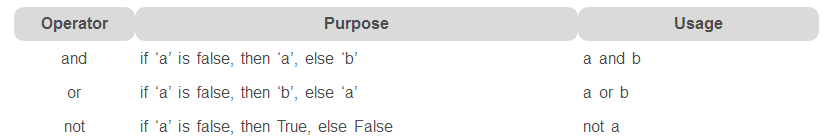

#### example

In [4]:
a=7
b=4

# Result: a and b is 4
print('a and b is',a and b)

# Result: a or b is 7
print('a or b is',a or b)

# Result: not a is False
print('not a is',not a)

('a and b is', 4)
('a or b is', 7)
('not a is', False)


### Bitwise Operators

Bitwise Python operators process the individual bits of integer values. They treat them as sequences of binary bits.

We can use bitwise operators to check whether a particular bit is set. For example, IoT applications read data from the sensors based on a specific bit is set or not. In such a situation, these operators can help.

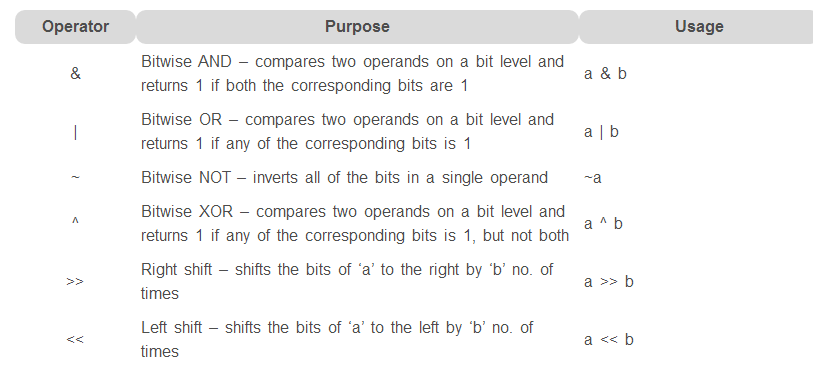

#### Example-

Let’s consider the numbers 4 and 6 whose binary representations are ‘00000100’ and ‘00000110’. Now, we’ll perform the AND operation on these numbers.

In [5]:
a=4
b=6

#Bitwise AND: The result of 'a & b' is 4
print('a & b is',a & b)

('a & b is', 4)


The above result is the outcome of following AND (‘&’) operation.
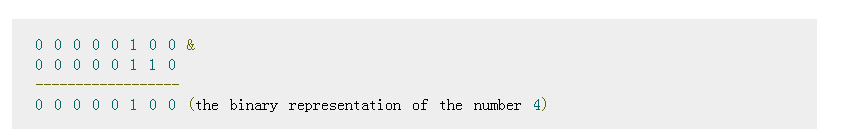


## Reference

* http://www.techbeamers.com/python-operators-tutorial-beginners/
* https://docs.python.org/2/library/inspect.html


## Q & A